Installing pm4py

In [10]:
pip install pm4py


Note: you may need to restart the kernel to use updated packages.


In [11]:
import pm4py

log = pm4py.read_xes('/Users/faizan/Documents/Masters/3rd_Semester/12696884/BPI_Challenge_2017.xes')
    
process_model, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log)

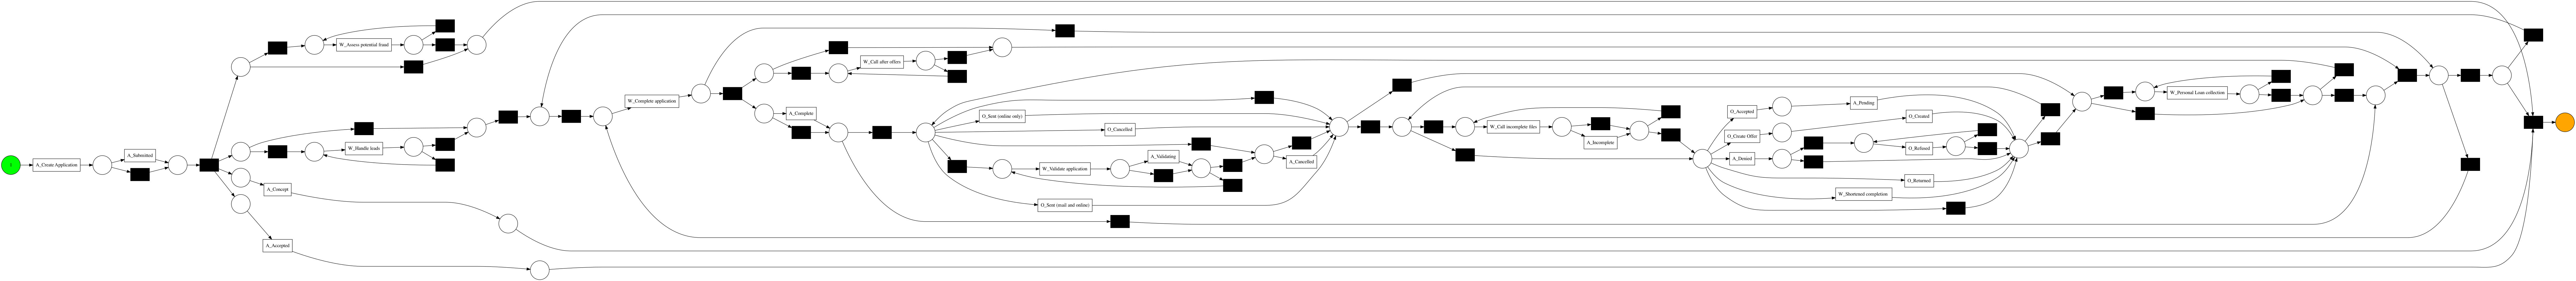

In [12]:
pm4py.view_petri_net(process_model, initial_marking, final_marking)

# Importing petrinet

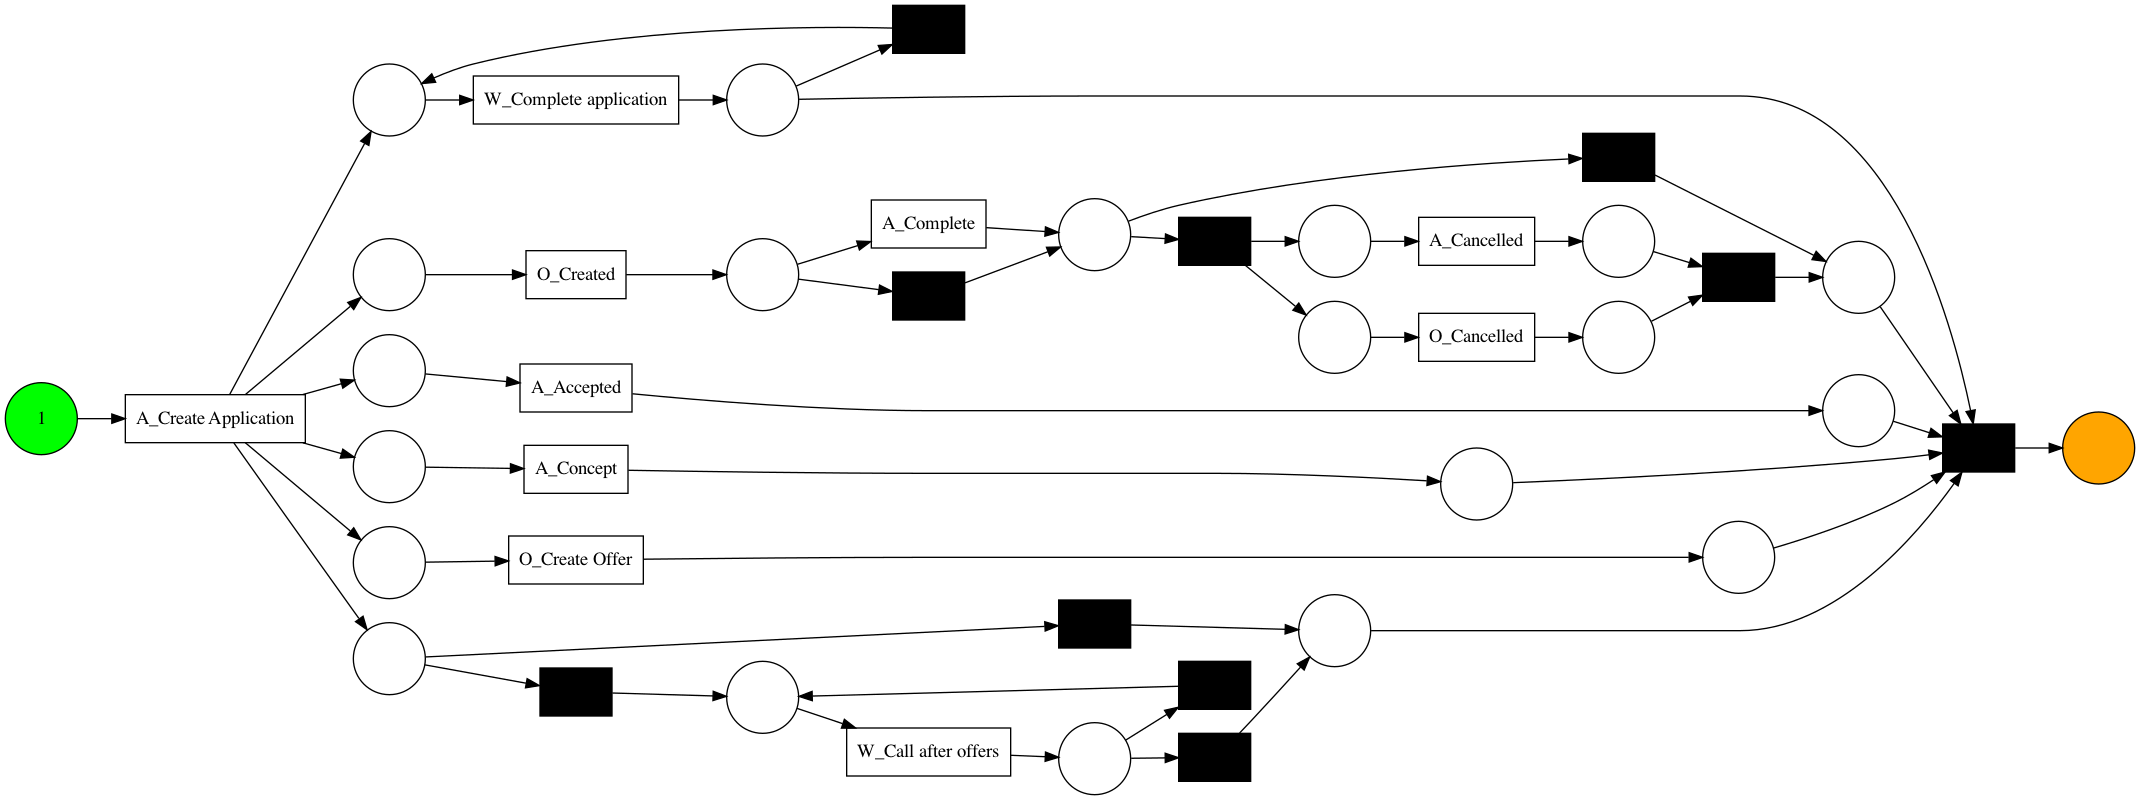

In [2]:
import os
from pm4py.objects.petri.importer import importer as pnml_importer
process_model, initial_marking, final_marking = pnml_importer.apply(os.path.join("output_petrinet.pnml"))
# print(final_marking)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
gviz = pn_visualizer.apply(process_model, initial_marking, final_marking)
pn_visualizer.view(gviz)
print(process_model)

In [3]:
from pm4py.objects.petri import semantics

transitions = semantics.enabled_transitions(process_model, initial_marking)

In [4]:
places = process_model.places
transitions = process_model.transitions
arcs = process_model.arcs

In [7]:
for place in places:
    print("\nPLACE: "+place.name)

    for arc in place.in_arcs:
        print(arc.source.name, arc.source.label)
        if not type(arc.source) is PetriNet.Place:
            print("yes")

    break


PLACE: n5
n23 A_Create Application


NameError: name 'PetriNet' is not defined

In [9]:
#Final Code

S = ['A_Create Application', 'A_Submitted', 'O_Created'] #Incomplete process input

current_task = S[-1] #Last element is current task

next_transitions = []
for current_tran in transitions: #Looking through all transitions in the model
    if str(current_tran) == current_task: #getting to current transition
#         print(current_tran) 
        for out_arc_current in current_tran.out_arcs: #Getting out arcs of current transition
#             print(out_arc_current.target)  #Getting next place
            for arc2 in out_arc_current.target.out_arcs: #Looping out arcs of next place
                next_transitions.append(arc2.target) #Getting next transition
next_transitions


[n36, A_Complete]

In [13]:
#Creating n-grams
n_grams = [S[i:] for i in range(len(S))]

print(n_grams)


[['A_Create Application', 'A_Submitted', 'O_Created'], ['A_Submitted', 'O_Created'], ['O_Created']]


In [14]:
for n in reversed(n_grams):
    print (n)
    break

['O_Created']


### pm4py.view_petri_net(process_model, initial_marking, final_marking, format="svg")
### svg format is not working

In [29]:
from pm4py.objects.log.util import sampling
sampled_log = sampling.sample(log, n=25)

In [255]:
print(sampled_log[10][1])

{'Action': 'statechange', 'org:resource': 'User_1', 'concept:name': 'A_Submitted', 'EventOrigin': 'Application', 'EventID': 'ApplState_1981947832', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2016, 3, 17, 20, 28, 53, 104000, tzinfo=datetime.timezone.utc)}


In [25]:
def import_xes(file_path):
    event_log = pm4py.read_xes(file_path)
    start_activities = pm4py.get_start_activities(event_log)
    end_activities = pm4py.get_end_activities(event_log)
    print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

In [257]:
log_2 = import_xes('/Users/faizan/Documents/Masters/3rd_Semester/12696884/BPI_Challenge_2017.xes')


Start activities: {'A_Create Application': 31509}
End activities: {'W_Validate application': 12662, 'O_Cancelled': 4436, 'W_Call after offers': 9457, 'W_Call incomplete files': 4676, 'W_Complete application': 144, 'W_Assess potential fraud': 102, 'W_Personal Loan collection': 2, 'W_Shortened completion ': 5, 'A_Denied': 1, 'O_Sent (online only)': 8, 'O_Sent (mail and online)': 15, 'O_Returned': 1}


In [31]:
for t in sampled_log:
    print(len(t))

41
20
59
37
46
31
52
29
33
35
42
23
18
20
18
74
42
99
18
33
36
33
44
20
21


In [ ]:
pm4py.filter_trace(,sampled_log)

In [ ]:
import pandas as pd

df = pd.DataFrame (columns = ['process_id','event_id' ,'event_name'])

for case_index, case in enumerate(sampled_log):
#     print("\n case index: %d  case id: %s" % (case_index, case.attributes["concept:name"]))
    for event_index, event in enumerate(case):
#         print("event index: %d  event activity: %s" % (event_index, event["concept:name"]))
        df = df.append(pd.DataFrame({'process_id': case_index, 'event_id': event_index, 'event_name': event["concept:name"]}, index=[0]), ignore_index=True)
# print (df)

# To be continued 
## https://pm4py.fit.fraunhofer.de/getting-started-page#discovery

- This documentation is good enough to complete most of our project
- Need to explore these functions to solve our n-grams problem